# Steepest descent

In [1]:
using Plots, ForwardDiff, Interact, Printf, LinearAlgebra

HTML{String}("<script>\n// Immediately-invoked-function-expression to avoid global variables.\n(function() {\n    var warning_div = document.getElementById(\"webio-warning-16518830629989320046\");\n    var hide = function () {\n        var script = document.getElementById(\"webio-setup-5149754387904921520\");\n        var parent = script && script.parentElement;\n        var grandparent = parent && parent.parentElement;\n        if (grandparent) {\n            grandparent.style.display = \"none\";\n        }\n        warning_div.style.display = \"none\";\n    };\n    if (typeof Jupyter !== \"undefined\") {\n        console.log(\"WebIO detected Jupyter notebook environment.\");\n        // Jupyter notebook.\n        var extensions = (\n            Jupyter\n            && Jupyter.notebook.config.data\n            && Jupyter.notebook.config.data.load_extensions\n        );\n        if (extensions && extensions[\"webio-jupyter-notebook\"]) {\n            // Extension already loaded.\n            console.log(\"Jupyter WebIO nbextension detected; not loading ad-hoc.\");\n            hide();\n            return;\n        }\n    } else if (window.location.pathname.includes(\"/lab\")) {\n        // Guessing JupyterLa\n        console.log(\"Jupyter Lab detected; make sure the @webio/jupyter-lab-provider labextension is installed.\");\n        hide();\n        return;\n    }\n})();\n\n</script>\n<p\n    id=\"webio-warning-16518830629989320046\"\n    class=\"output_text output_stderr\"\n    style=\"padding: 1em; font-weight: bold;\"\n>\n    Unable to load WebIO. Please make sure WebIO works for your Jupyter client.\n    For troubleshooting, please see <a href=\"https://juliagizmos.github.io/WebIO.jl/latest/providers/ijulia/\">\n    the WebIO/IJulia documentation</a>.\n    <!-- TODO: link to installation docs. -->\n</p>\n")

# Steepest descent on quadratic with exact linesearch

In [2]:
#f(x) = 1/2 x'Ax + b'x (ignoring constant terms)
function grad_method_exact_ls(A, b, x0, ϵ=1e-6)
    x = copy(x0)
    ∇f = A*x + b
    k = 0
    xtrace = x'
    while norm(∇f) > ϵ
        α = dot(∇f,∇f) / dot(∇f,A*∇f)
        x = x - α*∇f
        ∇f = A*x + b
        f = (1/2)x'*A*x + b'*x
        @printf "it = %3d | |∇f| = %8.2e | f = %8.2e\n" k norm(∇f) f
        k += 1
        xtrace = vcat(xtrace,x')
    end
    return xtrace
end


grad_method_exact_ls (generic function with 2 methods)

In [3]:
#Apply to f(x) = x^2+2y^2
A = [1 0;0 2]
b = [0, 0]
x0 = [2, 1]
xtrace = grad_method_exact_ls(A, b, x0);

it =   0 | |∇f| = 9.43e-01 | f = 3.33e-01
it =   1 | |∇f| = 3.14e-01 | f = 3.70e-02
it =   2 | |∇f| = 1.05e-01 | f = 4.12e-03
it =   3 | |∇f| = 3.49e-02 | f = 4.57e-04
it =   4 | |∇f| = 1.16e-02 | f = 5.08e-05
it =   5 | |∇f| = 3.88e-03 | f = 5.65e-06
it =   6 | |∇f| = 1.29e-03 | f = 6.27e-07
it =   7 | |∇f| = 4.31e-04 | f = 6.97e-08
it =   8 | |∇f| = 1.44e-04 | f = 7.74e-09
it =   9 | |∇f| = 4.79e-05 | f = 8.60e-10
it =  10 | |∇f| = 1.60e-05 | f = 9.56e-11
it =  11 | |∇f| = 5.32e-06 | f = 1.06e-11
it =  12 | |∇f| = 1.77e-06 | f = 1.18e-12
it =  13 | |∇f| = 5.91e-07 | f = 1.31e-13


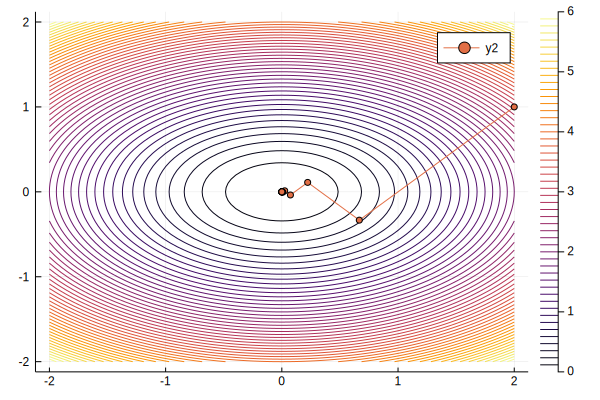

In [4]:
# contour plot
f(x1,x2) = (1/2)*[x1, x2]'*A*[x1, x2]+b'*[x1,x2]
x1 = -2:0.05:2
x2 = -2:0.05:2;

contour(x1, x2, f, levels = 50)
plot!(xtrace[:,1], xtrace[:,2], marker = 3)


# Gradient method with backtracking linesearch

In [5]:
function grad_method_backtracking(fObj, gObj, x0; ϵ = 1e-6, μ = 1e-5, maxits = 1000)
    x = copy(x0)
    f = fObj(x)
    ∇f = gObj(x)
    k = 0
    xtrace = x'
    while norm(∇f) > ϵ && k < maxits
        α = 1.0
        while ((f - fObj(x-α*∇f)) < μ*α*dot(∇f,∇f) )
            α /=2
        end
        x = x-α*∇f
        f = fObj(x)
        ∇f = gObj(x)
        @printf "it = %3d | |∇f| = %8.2e | f = %8.2e\n" k norm(∇f) f
        k += 1
        xtrace = vcat(xtrace,x')
    end
    return x, xtrace
end

grad_method_backtracking (generic function with 1 method)

it =   0 | |∇f| = 2.00e+00 | f = 2.00e+00
it =   1 | |∇f| = 0.00e+00 | f = 0.00e+00


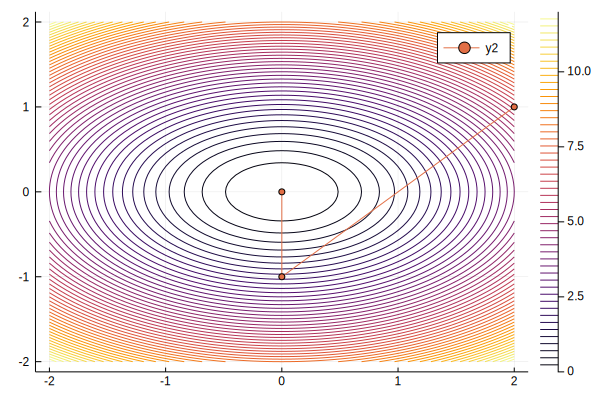

In [6]:
#Apply to f(x) = x^2 + 2y^2
A = [1 0; 0 2]
b = [0, 0]
x0 = [2 ,1]
f(x) = x'*A*x + b'*x
∇f(x) = A*x + b
x, xtrace = grad_method_backtracking(f, ∇f, x0);

f(x1,x2) = x1^2 + 2x2^2
x1 = -2:0.05:2
x2 = -2:0.05:2
contour(x1, x2, f, levels = 50)
plot!(xtrace[:,1],xtrace[:,2],marker = 3)


In [7]:
#Apply to f(x) = x^2 + y^2/100
A = [1 0; 0 1/100]
b = [0, 0]
x0 = [2 ,1]
f(x) = x'*A*x + b'*x
∇f(x) = A*x + b
x, xtrace = grad_method_backtracking(f, ∇f, x0, μ= 1e-1);

it =   0 | |∇f| = 9.90e-03 | f = 9.80e-03
it =   1 | |∇f| = 9.80e-03 | f = 9.61e-03
it =   2 | |∇f| = 9.70e-03 | f = 9.41e-03
it =   3 | |∇f| = 9.61e-03 | f = 9.23e-03
it =   4 | |∇f| = 9.51e-03 | f = 9.04e-03
it =   5 | |∇f| = 9.41e-03 | f = 8.86e-03
it =   6 | |∇f| = 9.32e-03 | f = 8.69e-03
it =   7 | |∇f| = 9.23e-03 | f = 8.51e-03
it =   8 | |∇f| = 9.14e-03 | f = 8.35e-03
it =   9 | |∇f| = 9.04e-03 | f = 8.18e-03
it =  10 | |∇f| = 8.95e-03 | f = 8.02e-03
it =  11 | |∇f| = 8.86e-03 | f = 7.86e-03
it =  12 | |∇f| = 8.78e-03 | f = 7.70e-03
it =  13 | |∇f| = 8.69e-03 | f = 7.55e-03
it =  14 | |∇f| = 8.60e-03 | f = 7.40e-03
it =  15 | |∇f| = 8.51e-03 | f = 7.25e-03
it =  16 | |∇f| = 8.43e-03 | f = 7.11e-03
it =  17 | |∇f| = 8.35e-03 | f = 6.96e-03
it =  18 | |∇f| = 8.26e-03 | f = 6.83e-03
it =  19 | |∇f| = 8.18e-03 | f = 6.69e-03
it =  20 | |∇f| = 8.10e-03 | f = 6.56e-03
it =  21 | |∇f| = 8.02e-03 | f = 6.43e-03
it =  22 | |∇f| = 7.94e-03 | f = 6.30e-03
it =  23 | |∇f| = 7.86e-03 | f = 6

it = 232 | |∇f| = 9.62e-04 | f = 9.25e-05
it = 233 | |∇f| = 9.52e-04 | f = 9.06e-05
it = 234 | |∇f| = 9.42e-04 | f = 8.88e-05
it = 235 | |∇f| = 9.33e-04 | f = 8.71e-05
it = 236 | |∇f| = 9.24e-04 | f = 8.53e-05
it = 237 | |∇f| = 9.14e-04 | f = 8.36e-05
it = 238 | |∇f| = 9.05e-04 | f = 8.20e-05
it = 239 | |∇f| = 8.96e-04 | f = 8.03e-05
it = 240 | |∇f| = 8.87e-04 | f = 7.87e-05
it = 241 | |∇f| = 8.78e-04 | f = 7.72e-05
it = 242 | |∇f| = 8.70e-04 | f = 7.56e-05
it = 243 | |∇f| = 8.61e-04 | f = 7.41e-05
it = 244 | |∇f| = 8.52e-04 | f = 7.27e-05
it = 245 | |∇f| = 8.44e-04 | f = 7.12e-05
it = 246 | |∇f| = 8.35e-04 | f = 6.98e-05
it = 247 | |∇f| = 8.27e-04 | f = 6.84e-05
it = 248 | |∇f| = 8.19e-04 | f = 6.70e-05
it = 249 | |∇f| = 8.11e-04 | f = 6.57e-05
it = 250 | |∇f| = 8.02e-04 | f = 6.44e-05
it = 251 | |∇f| = 7.94e-04 | f = 6.31e-05
it = 252 | |∇f| = 7.87e-04 | f = 6.19e-05
it = 253 | |∇f| = 7.79e-04 | f = 6.06e-05
it = 254 | |∇f| = 7.71e-04 | f = 5.94e-05
it = 255 | |∇f| = 7.63e-04 | f = 5

it = 436 | |∇f| = 1.24e-04 | f = 1.53e-06
it = 437 | |∇f| = 1.23e-04 | f = 1.50e-06
it = 438 | |∇f| = 1.21e-04 | f = 1.47e-06
it = 439 | |∇f| = 1.20e-04 | f = 1.44e-06
it = 440 | |∇f| = 1.19e-04 | f = 1.41e-06
it = 441 | |∇f| = 1.18e-04 | f = 1.39e-06
it = 442 | |∇f| = 1.17e-04 | f = 1.36e-06
it = 443 | |∇f| = 1.15e-04 | f = 1.33e-06
it = 444 | |∇f| = 1.14e-04 | f = 1.30e-06
it = 445 | |∇f| = 1.13e-04 | f = 1.28e-06
it = 446 | |∇f| = 1.12e-04 | f = 1.25e-06
it = 447 | |∇f| = 1.11e-04 | f = 1.23e-06
it = 448 | |∇f| = 1.10e-04 | f = 1.20e-06
it = 449 | |∇f| = 1.09e-04 | f = 1.18e-06
it = 450 | |∇f| = 1.08e-04 | f = 1.16e-06
it = 451 | |∇f| = 1.06e-04 | f = 1.13e-06
it = 452 | |∇f| = 1.05e-04 | f = 1.11e-06
it = 453 | |∇f| = 1.04e-04 | f = 1.09e-06
it = 454 | |∇f| = 1.03e-04 | f = 1.07e-06
it = 455 | |∇f| = 1.02e-04 | f = 1.05e-06
it = 456 | |∇f| = 1.01e-04 | f = 1.02e-06
it = 457 | |∇f| = 1.00e-04 | f = 1.00e-06
it = 458 | |∇f| = 9.92e-05 | f = 9.84e-07
it = 459 | |∇f| = 9.82e-05 | f = 9

it = 777 | |∇f| = 4.02e-06 | f = 1.62e-09
it = 778 | |∇f| = 3.98e-06 | f = 1.58e-09
it = 779 | |∇f| = 3.94e-06 | f = 1.55e-09
it = 780 | |∇f| = 3.90e-06 | f = 1.52e-09
it = 781 | |∇f| = 3.86e-06 | f = 1.49e-09
it = 782 | |∇f| = 3.82e-06 | f = 1.46e-09
it = 783 | |∇f| = 3.78e-06 | f = 1.43e-09
it = 784 | |∇f| = 3.75e-06 | f = 1.40e-09
it = 785 | |∇f| = 3.71e-06 | f = 1.38e-09
it = 786 | |∇f| = 3.67e-06 | f = 1.35e-09
it = 787 | |∇f| = 3.64e-06 | f = 1.32e-09
it = 788 | |∇f| = 3.60e-06 | f = 1.30e-09
it = 789 | |∇f| = 3.56e-06 | f = 1.27e-09
it = 790 | |∇f| = 3.53e-06 | f = 1.24e-09
it = 791 | |∇f| = 3.49e-06 | f = 1.22e-09
it = 792 | |∇f| = 3.46e-06 | f = 1.20e-09
it = 793 | |∇f| = 3.42e-06 | f = 1.17e-09
it = 794 | |∇f| = 3.39e-06 | f = 1.15e-09
it = 795 | |∇f| = 3.35e-06 | f = 1.13e-09
it = 796 | |∇f| = 3.32e-06 | f = 1.10e-09
it = 797 | |∇f| = 3.29e-06 | f = 1.08e-09
it = 798 | |∇f| = 3.25e-06 | f = 1.06e-09
it = 799 | |∇f| = 3.22e-06 | f = 1.04e-09
it = 800 | |∇f| = 3.19e-06 | f = 1

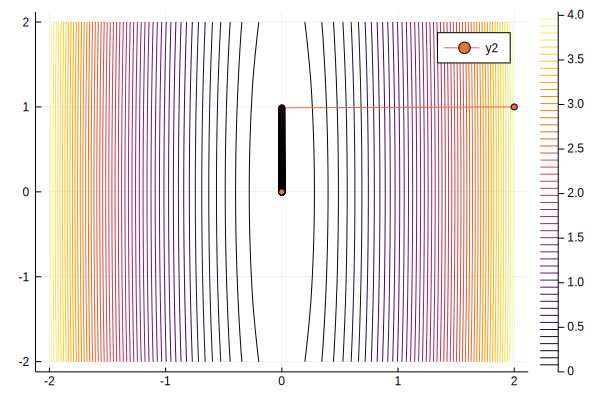

In [8]:
f(x1,x2) = x1^2 + x2^2/100
x1 = -2:0.05:2
x2 = -2:0.05:2
contour(x1, x2, f, levels = 50)
plot!(xtrace[:,1],xtrace[:,2],marker = 3)

In [9]:
#Rosenbrock
A = [802 -400;-400 200]
λ = eigvals(A)

2-element Array{Float64,1}:
    0.3993607674876216
 1001.6006392325123   

In [10]:
κ = λ[2]/λ[1]

2508.0096012775152

In [11]:
f(x) = 100(x[2]-x[1]^2)^2+(1-x[1])^2
∇f(x) = ForwardDiff.gradient(f,x)
x0 = [2,5]
x, xtrace = grad_method_backtracking(f, ∇f, x0, μ = 1e-4, maxits = 1000);

it =   0 | |∇f| = 7.92e+02 | f = 6.72e+01
it =   1 | |∇f| = 8.80e+01 | f = 2.44e+00
it =   2 | |∇f| = 5.41e-01 | f = 1.49e+00
it =   3 | |∇f| = 4.56e+00 | f = 1.49e+00
it =   4 | |∇f| = 4.66e+00 | f = 1.49e+00
it =   5 | |∇f| = 4.76e+00 | f = 1.49e+00
it =   6 | |∇f| = 4.86e+00 | f = 1.49e+00
it =   7 | |∇f| = 4.97e+00 | f = 1.49e+00
it =   8 | |∇f| = 5.07e+00 | f = 1.49e+00
it =   9 | |∇f| = 5.18e+00 | f = 1.49e+00
it =  10 | |∇f| = 5.39e-01 | f = 1.49e+00
it =  11 | |∇f| = 7.74e+00 | f = 1.49e+00
it =  12 | |∇f| = 5.39e-01 | f = 1.48e+00
it =  13 | |∇f| = 4.36e+00 | f = 1.48e+00
it =  14 | |∇f| = 4.42e+00 | f = 1.48e+00
it =  15 | |∇f| = 4.47e+00 | f = 1.48e+00
it =  16 | |∇f| = 4.52e+00 | f = 1.48e+00
it =  17 | |∇f| = 4.57e+00 | f = 1.48e+00
it =  18 | |∇f| = 4.62e+00 | f = 1.48e+00
it =  19 | |∇f| = 4.68e+00 | f = 1.48e+00
it =  20 | |∇f| = 4.73e+00 | f = 1.48e+00
it =  21 | |∇f| = 4.78e+00 | f = 1.48e+00
it =  22 | |∇f| = 4.84e+00 | f = 1.47e+00
it =  23 | |∇f| = 4.89e+00 | f = 1

it = 232 | |∇f| = 5.63e+00 | f = 1.45e+00
it = 233 | |∇f| = 5.58e+00 | f = 1.45e+00
it = 234 | |∇f| = 5.52e+00 | f = 1.45e+00
it = 235 | |∇f| = 5.47e+00 | f = 1.45e+00
it = 236 | |∇f| = 5.42e+00 | f = 1.45e+00
it = 237 | |∇f| = 5.36e+00 | f = 1.45e+00
it = 238 | |∇f| = 5.31e+00 | f = 1.45e+00
it = 239 | |∇f| = 5.25e+00 | f = 1.45e+00
it = 240 | |∇f| = 5.20e+00 | f = 1.45e+00
it = 241 | |∇f| = 5.14e+00 | f = 1.44e+00
it = 242 | |∇f| = 5.09e+00 | f = 1.44e+00
it = 243 | |∇f| = 5.04e+00 | f = 1.44e+00
it = 244 | |∇f| = 4.98e+00 | f = 1.44e+00
it = 245 | |∇f| = 4.93e+00 | f = 1.44e+00
it = 246 | |∇f| = 4.88e+00 | f = 1.44e+00
it = 247 | |∇f| = 4.82e+00 | f = 1.44e+00
it = 248 | |∇f| = 4.77e+00 | f = 1.44e+00
it = 249 | |∇f| = 4.72e+00 | f = 1.44e+00
it = 250 | |∇f| = 4.66e+00 | f = 1.44e+00
it = 251 | |∇f| = 4.61e+00 | f = 1.44e+00
it = 252 | |∇f| = 4.56e+00 | f = 1.44e+00
it = 253 | |∇f| = 4.50e+00 | f = 1.44e+00
it = 254 | |∇f| = 4.45e+00 | f = 1.44e+00
it = 255 | |∇f| = 4.40e+00 | f = 1

it = 466 | |∇f| = 1.14e+00 | f = 1.41e+00
it = 467 | |∇f| = 1.11e+00 | f = 1.41e+00
it = 468 | |∇f| = 1.08e+00 | f = 1.41e+00
it = 469 | |∇f| = 1.05e+00 | f = 1.41e+00
it = 470 | |∇f| = 1.02e+00 | f = 1.41e+00
it = 471 | |∇f| = 1.00e+00 | f = 1.41e+00
it = 472 | |∇f| = 9.76e-01 | f = 1.41e+00
it = 473 | |∇f| = 9.52e-01 | f = 1.41e+00
it = 474 | |∇f| = 9.30e-01 | f = 1.41e+00
it = 475 | |∇f| = 9.09e-01 | f = 1.41e+00
it = 476 | |∇f| = 8.89e-01 | f = 1.41e+00
it = 477 | |∇f| = 8.69e-01 | f = 1.41e+00
it = 478 | |∇f| = 8.51e-01 | f = 1.41e+00
it = 479 | |∇f| = 8.33e-01 | f = 1.41e+00
it = 480 | |∇f| = 8.16e-01 | f = 1.41e+00
it = 481 | |∇f| = 8.00e-01 | f = 1.41e+00
it = 482 | |∇f| = 7.84e-01 | f = 1.41e+00
it = 483 | |∇f| = 7.70e-01 | f = 1.41e+00
it = 484 | |∇f| = 7.56e-01 | f = 1.41e+00
it = 485 | |∇f| = 7.42e-01 | f = 1.41e+00
it = 486 | |∇f| = 1.61e+00 | f = 1.41e+00
it = 487 | |∇f| = 1.56e+00 | f = 1.41e+00
it = 488 | |∇f| = 1.52e+00 | f = 1.41e+00
it = 489 | |∇f| = 1.47e+00 | f = 1

it = 695 | |∇f| = 8.29e-01 | f = 1.38e+00
it = 696 | |∇f| = 8.01e-01 | f = 1.38e+00
it = 697 | |∇f| = 7.76e-01 | f = 1.38e+00
it = 698 | |∇f| = 7.52e-01 | f = 1.38e+00
it = 699 | |∇f| = 1.64e+00 | f = 1.38e+00
it = 700 | |∇f| = 1.56e+00 | f = 1.38e+00
it = 701 | |∇f| = 1.48e+00 | f = 1.38e+00
it = 702 | |∇f| = 1.40e+00 | f = 1.38e+00
it = 703 | |∇f| = 1.34e+00 | f = 1.38e+00
it = 704 | |∇f| = 1.27e+00 | f = 1.38e+00
it = 705 | |∇f| = 1.21e+00 | f = 1.38e+00
it = 706 | |∇f| = 1.15e+00 | f = 1.38e+00
it = 707 | |∇f| = 1.10e+00 | f = 1.38e+00
it = 708 | |∇f| = 1.05e+00 | f = 1.38e+00
it = 709 | |∇f| = 1.01e+00 | f = 1.38e+00
it = 710 | |∇f| = 9.66e-01 | f = 1.38e+00
it = 711 | |∇f| = 9.27e-01 | f = 1.38e+00
it = 712 | |∇f| = 8.91e-01 | f = 1.38e+00
it = 713 | |∇f| = 8.57e-01 | f = 1.38e+00
it = 714 | |∇f| = 8.26e-01 | f = 1.38e+00
it = 715 | |∇f| = 7.98e-01 | f = 1.38e+00
it = 716 | |∇f| = 7.72e-01 | f = 1.38e+00
it = 717 | |∇f| = 7.48e-01 | f = 1.37e+00
it = 718 | |∇f| = 1.62e+00 | f = 1

it = 928 | |∇f| = 1.02e+00 | f = 1.34e+00
it = 929 | |∇f| = 9.58e-01 | f = 1.34e+00
it = 930 | |∇f| = 9.05e-01 | f = 1.34e+00
it = 931 | |∇f| = 8.57e-01 | f = 1.34e+00
it = 932 | |∇f| = 8.14e-01 | f = 1.34e+00
it = 933 | |∇f| = 7.76e-01 | f = 1.34e+00
it = 934 | |∇f| = 7.42e-01 | f = 1.34e+00
it = 935 | |∇f| = 1.58e+00 | f = 1.34e+00
it = 936 | |∇f| = 1.47e+00 | f = 1.34e+00
it = 937 | |∇f| = 1.36e+00 | f = 1.34e+00
it = 938 | |∇f| = 1.27e+00 | f = 1.34e+00
it = 939 | |∇f| = 1.18e+00 | f = 1.34e+00
it = 940 | |∇f| = 1.11e+00 | f = 1.34e+00
it = 941 | |∇f| = 1.04e+00 | f = 1.34e+00
it = 942 | |∇f| = 9.75e-01 | f = 1.34e+00
it = 943 | |∇f| = 9.19e-01 | f = 1.34e+00
it = 944 | |∇f| = 8.68e-01 | f = 1.34e+00
it = 945 | |∇f| = 8.23e-01 | f = 1.34e+00
it = 946 | |∇f| = 7.84e-01 | f = 1.34e+00
it = 947 | |∇f| = 7.48e-01 | f = 1.34e+00
it = 948 | |∇f| = 1.61e+00 | f = 1.34e+00
it = 949 | |∇f| = 1.49e+00 | f = 1.34e+00
it = 950 | |∇f| = 1.38e+00 | f = 1.34e+00
it = 951 | |∇f| = 1.28e+00 | f = 1

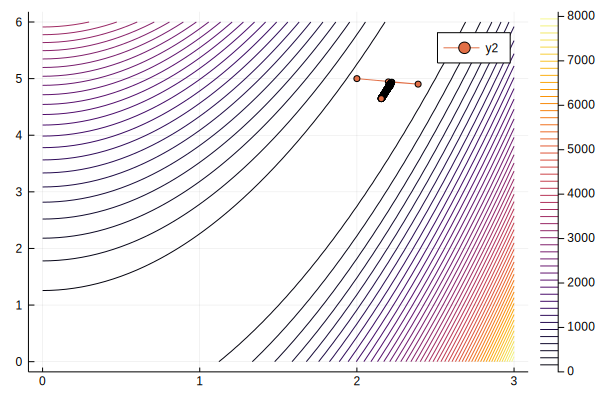

In [12]:
f(x1,x2) = 100(x2-x1^2)^2+(1-x1)^2
x1 = 0:0.05:3
x2 = 0:0.05:6
contour(x1, x2, f, levels = 50)
plot!(xtrace[:,1],xtrace[:,2],marker = 3)

In [13]:
f(x) = 100(x[2]-x[1]^2)^2+(1-x[1])^2
Hf(x) = ForwardDiff.hessian(f,x)
xmin = [1,1];

In [14]:
# compute inverse of hessian using eigenvalue decomposition

F = eigen(Hf(xmin))
Λinv = diagm(1 ./ F.values)
Q = F.vectors

Hf(xmin)*Q*Λinv*Q'


2×2 Array{Float64,2}:
 1.0          1.27343e-13
 4.44089e-15  1.0        